This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.
#EDA 
#RFM Model
#More Insights will be updated as data suggests




In [4]:
#Loading the required libraries:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt
import calendar
from scipy.stats import skew,kurtosis



In [5]:
order = pd.read_csv("E:\Kaggle\olist_public_dataset_v2.csv")  ## Unclassified orders dataset
customer=pd.read_csv("E:\Kaggle\olist_public_dataset_v2_customers.csv")  ##Unique customer id 
payment =pd.read_csv("E:\Kaggle\payments_olist_public_dataset.csv")  ##Payment dataset
product = pd.read_csv("E:\Kaggle\product_category_name_translation.csv")  ## Product translation to english
geo=pd.read_csv("E:\Kaggle\geolocation_olist_public_dataset.csv")  ## Location data
sellers=pd.read_csv("E:\Kaggle\sellers_olist_public_dataset_.csv") ## Seller information


In [6]:
order.shape

(100000, 25)

In [7]:
customer.shape


(96264, 2)

In [8]:
payment.shape


(97433, 5)

In [9]:
product.shape


(71, 2)

In [10]:
geo.shape

(323016, 5)

In [11]:
sellers.shape

(98981, 6)

In [12]:
order.head()


,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [13]:
#merging order and pay using left join
order_pay = pd.merge(order,payment, how ="left", on=['order_id', 'order_id'])
order_pay.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,installments,sequential,payment_type,value
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00,1.0,1.0,boleto,363.74
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00,1.0,1.0,credit_card,30.10
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00,10.0,1.0,credit_card,256.90
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00,4.0,1.0,credit_card,48.22
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00,1.0,1.0,boleto,343.64


In [14]:

#order_pay.info()
#product.info()
#product.head()
#merging order_pay and product on the basis of product categories
order_pay_prod = pd.merge(order_pay,product, how = "left", on = ['product_category_name','product_category_name'])
order_pay_prod.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,installments,sequential,payment_type,value,product_category_name_english
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00,1.0,1.0,boleto,363.74,health_beauty
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00,1.0,1.0,credit_card,30.10,computers_accessories
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00,10.0,1.0,credit_card,256.90,auto
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00,4.0,1.0,credit_card,48.22,bed_bath_table
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00,1.0,1.0,boleto,343.64,furniture_decor


Total number of unique orders and customers 


In [15]:
uni_orders= order['order_id'].nunique()
uni_customers= order['customer_id'].nunique()
print(f"total number of unique order in database:{uni_orders}")
print(f"total number of unique customers in database:{uni_customers}")

total number of unique order in database:96264
total number of unique customers in database:96264


In [16]:
status_order= order.groupby('order_status')['order_id'].nunique().sort_values()
status_order

order_status
approved           2
unavailable        9
invoiced         316
processing       382
canceled         480
shipped         1163
delivered      93912
Name: order_id, dtype: int64

In [17]:
#summary
print("Max order amount :", order["order_products_value"].max())
print("Min order amount :", order["order_products_value"].min())
print("Mean order amount :", order["order_products_value"].mean())
print("Median order amount :", order["order_products_value"].median())

Max order amount : 13440.0
Min order amount : 2.0
Mean order amount : 129.19170360012242
Median order amount : 83.65


In [18]:
#order value on the basis of order product category 

pod_type_value = order.groupby('product_category_name')['order_products_value','order_freight_value'].sum().sort_values(by='order_products_value',ascending= False).reset_index()


In [19]:
pod_type_value.head(10)

,product_category_name,order_products_value,order_freight_value
0,relogios_presentes,1337041.00,117014.99
1,beleza_saude,1081665.93,158490.12
2,cama_mesa_banho,1056703.34,205529.22
3,esporte_lazer,961111.91,170545.10
4,informatica_acessorios,859228.95,137728.17
5,moveis_decoracao,807599.95,187603.16
6,cool_stuff,781994.60,98848.35
7,utilidades_domesticas,608886.28,144322.95
8,ferramentas_jardim,603535.36,128996.87
9,brinquedos,474985.20,79459.93


In [20]:
##order value on the basis of order id
order_value = order.groupby('order_id')['order_products_value','order_freight_value'].sum().sort_values(by='order_products_value',ascending= False).reset_index()
order_value.head()

,order_id,order_products_value,order_freight_value
0,03caa2c082116e1d31e67e9ae3700499,13440.0,224.08
1,453988a33cf7b5cb5ce32385e9ecfcdc,9798.0,140.44
2,a96610ab360d42a2e5335a3998b4718a,9598.0,302.68
3,20926be916c5a88fd0554fc7dbf62e37,8250.0,137.60
4,736e1922ae60d0d6a89247b851902527,7160.0,114.88


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Frequency')

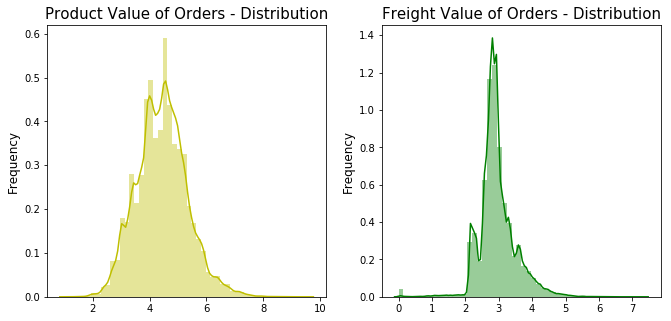

In [21]:
plt.figure(figsize=(11,11))

plt.subplot(221)
g = sns.distplot(np.log(order['order_products_value']+1),color = "y")
g.set_title("Product Value of Orders - Distribution", fontsize=15)
g.set_xlabel("")
g.set_ylabel("Frequency", fontsize=12)

plt.subplot(222)
g1 = sns.distplot(np.log(order['order_freight_value'] + 1),color = "g")
g1.set_title("Freight Value of Orders - Distribution", fontsize=15)
g1.set_xlabel("")
g1.set_ylabel("Frequency", fontsize=12)

In [22]:
#checking skew and kutosis of product value of oders
print("Skewness of transaction:", skew(np.log(order['order_products_value']+1)))
print("Kurtosis of transaction", kurtosis(np.log(order['order_products_value']+1)))

Skewness of transaction: 0.2761845268559907
Kurtosis of transaction 0.3903715071880147


skewness suggests data is fairly symmetrical and positive where kurtosis value is <3

In [23]:
#number of products people usually do
order_peeps_do = order.groupby('order_id')['order_items_qty'].aggregate(sum).reset_index()
order_peeps_do = order_peeps_do['order_items_qty'].value_counts()
order_peeps_do.head(30)

1     86505
2      7612
3      1203
4       531
5       184
6       167
7        17
8        14
10        8
12        7
20        4
15        4
9         4
11        2
18        1
14        1
Name: order_items_qty, dtype: int64

Text(0,0.5,'Number of orders')

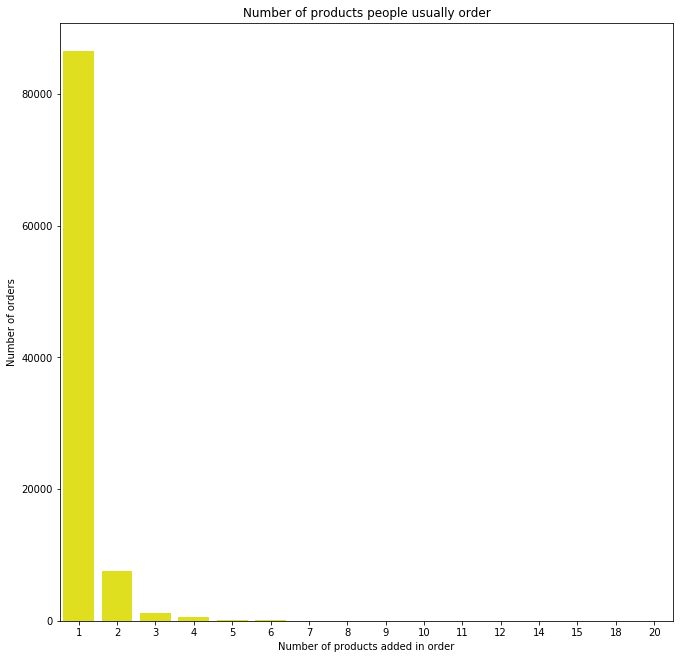

In [24]:
plt.figure(figsize=(11,11))
bar=sns.barplot(x=order_peeps_do.index,y=order_peeps_do.values,color="yellow")
bar.set_title("Number of products people usually order")
bar.set_xlabel("Number of products added in order")
bar.set_ylabel("Number of orders")



Text(0,0.5,'Number of products bought')

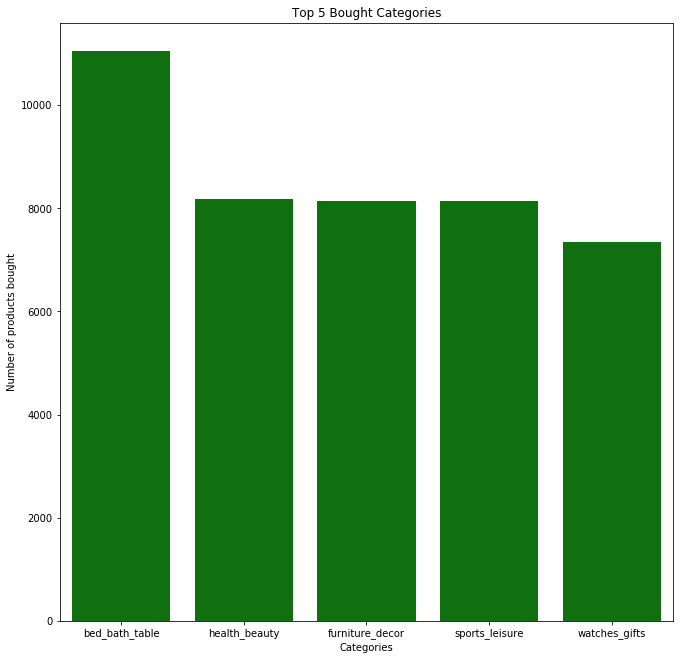

In [25]:
#most number of products bought category wise
most_bought= order_pay_prod.groupby('product_category_name_english').aggregate({'order_id':'count'}).rename(columns={'order_id':'o_count'}).sort_values(by='o_count',ascending= False).reset_index()
plt.figure(figsize=(11,11))
most=sns.barplot(x='product_category_name_english',y='o_count',data= most_bought[:5],color="green")
most.set_title("Top 5 Bought Categories")
most.set_xlabel("Categories")
most.set_ylabel("Number of products bought")




Clearly Bed bath table is the most bought category

In [26]:
#converting order_purchase_timestamp and order_delivered_customer_date to divide them into columns year, month, monthday,weekday and hour
order_pay_prod['order_purchase_timestamp'] =pd.to_datetime(order_pay_prod['order_purchase_timestamp'])
order_pay_prod['order_delivered_customer_date']= pd.to_datetime(order_pay_prod['order_delivered_customer_date'])
order_pay_prod['year'] = order_pay_prod['order_purchase_timestamp'].dt.year
order_pay_prod['month'] = order_pay_prod['order_purchase_timestamp'].dt.month
order_pay_prod['weekday'] = order_pay_prod['order_purchase_timestamp'].dt.weekday_name
order_pay_prod['week'] = order_pay_prod['order_purchase_timestamp'].dt.weekday
order_pay_prod['monthday'] = order_pay_prod['order_purchase_timestamp'].dt.day
order_pay_prod['hour'] = order_pay_prod['order_purchase_timestamp'].dt.hour
order_pay_prod.head(10)

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,sequential,payment_type,value,product_category_name_english,year,month,weekday,week,monthday,hour
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,1.0,boleto,363.74,health_beauty,2017,1,Tuesday,1,31,17
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,1.0,credit_card,30.10,computers_accessories,2017,9,Saturday,5,9,19
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,1.0,credit_card,256.90,auto,2017,1,Monday,0,30,17
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,1.0,credit_card,48.22,bed_bath_table,2018,3,Sunday,6,11,18
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,1.0,boleto,343.64,furniture_decor,2017,4,Thursday,3,20,8
5,80dbbd6f2282898dbf912a2ec668175f,delivered,160.00,19.00,1,1,2018-04-03 13:25:35,2018-04-03 13:48:55.262983,2018-05-07 00:00:00.000000,2018-04-18 23:22:45.922709,...,1.0,credit_card,179.00,sports_leisure,2018,4,Tuesday,1,3,13
6,0f374228bdae432c9bdda69f21ccd261,delivered,25.00,19.09,1,1,2018-06-11 19:45:54,2018-06-11 20:22:07.752257,2018-07-04 00:00:00.000000,2018-06-29 20:52:35.173465,...,1.0,voucher,44.09,perfumery,2018,6,Monday,0,11,19
7,d02366be68b26b954269321e475a79fe,delivered,43.30,17.44,2,1,2017-08-27 15:29:59,2017-08-27 15:45:22.034556,2017-09-13 00:00:00.000000,2017-08-30 18:10:20.939031,...,1.0,credit_card,60.74,housewares,2017,8,Sunday,6,27,15
8,d42c3af33e0f04b3d5f012b6559e70c9,delivered,89.90,14.80,1,1,2017-03-13 15:43:08,2017-03-13 15:43:08.000000,2017-04-04 00:00:00.000000,2017-03-22 13:08:38.524197,...,1.0,credit_card,104.70,bed_bath_table,2017,3,Monday,0,13,15
9,92e9390c69bcb745fe059efdf93cac2a,delivered,40.00,8.88,1,1,2018-05-07 21:13:12,2018-05-07 21:31:19.636651,2018-05-17 00:00:00.000000,2018-05-10 23:25:30.303778,...,1.0,credit_card,48.88,furniture_decor,2018,5,Monday,0,7,21


Text(0,0.5,'Value')

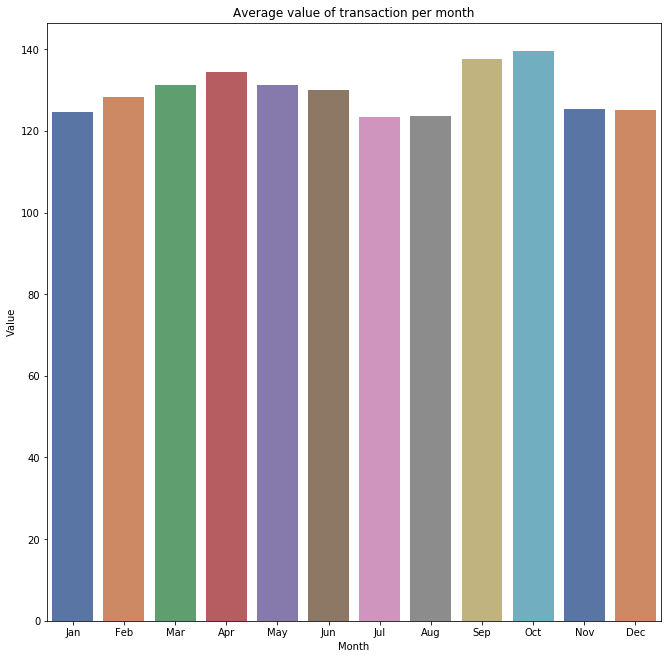

In [27]:
#monthly trend

monthly_trend=pd.DataFrame(order_pay_prod.groupby('month').agg({'order_products_value':'mean'}).rename(columns={'order_products_value':'mean_transaction'})).reset_index()
x1 = monthly_trend.month.tolist()
y1 = monthly_trend.mean_transaction.tolist()
month_name = [calendar.month_abbr[int(x)] for x in sorted(x1)]

plt.figure(figsize=(11,11))
ax=sns.barplot(x=month_name,y=y1, palette="deep")
ax.set_title("Average value of transaction per month")
ax.set_xlabel('Month')
ax.set_ylabel('Value')



Text(0,0.5,'Transactional Value')

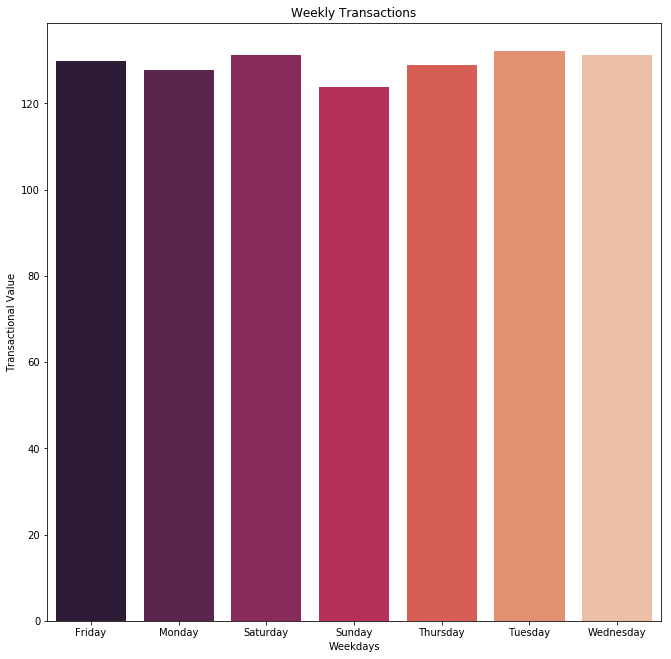

In [28]:
#weekday trends on the basis of transactional value
week_trend = pd.DataFrame(order_pay_prod.groupby('weekday').agg({'order_products_value':'mean'}).rename(columns={'order_products_value':'mean_transc'}).reset_index())
week_list = week_trend.weekday.tolist()
week_mean_list = week_trend.mean_transc.tolist()

plt.figure(figsize=(11,11))
wt= sns.barplot(x=week_list, y = week_mean_list, palette='rocket')
wt.set_title("Weekly Transactions")
wt.set_xlabel("Weekdays")
wt.set_ylabel("Transactional Value")

Text(0,0.5,'Number of Orders')

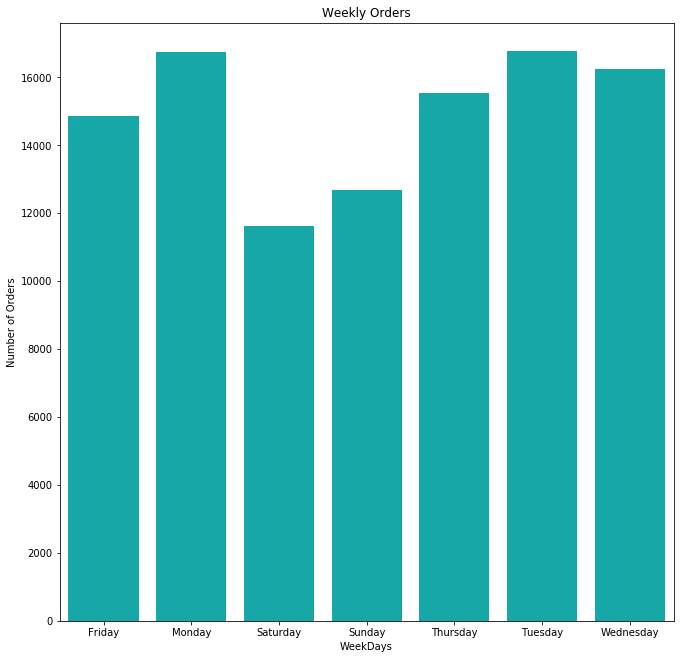

In [155]:
#weekday trend on the basis of order count 
weekt_order= pd.DataFrame(order_pay_prod.groupby('weekday').agg({'order_id':'count'}).rename(columns={'order_id':'Num_Count'}).reset_index())
#mean_orders= weekt_order['Num_count'].mena to be done
week_count_list = weekt_order.Num_Count.tolist()
weekday_list=weekt_order.weekday.tolist()

plt.figure(figsize=(11,11))
wo= sns.barplot(x=weekday_list, y= week_count_list, color='c')
wo.set_title("Weekly Orders")
wo.set_xlabel("WeekDays")
wo.set_ylabel("Number of Orders")


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(621.114,0.5,'Number of Orders')

<Figure size 792x792 with 0 Axes>

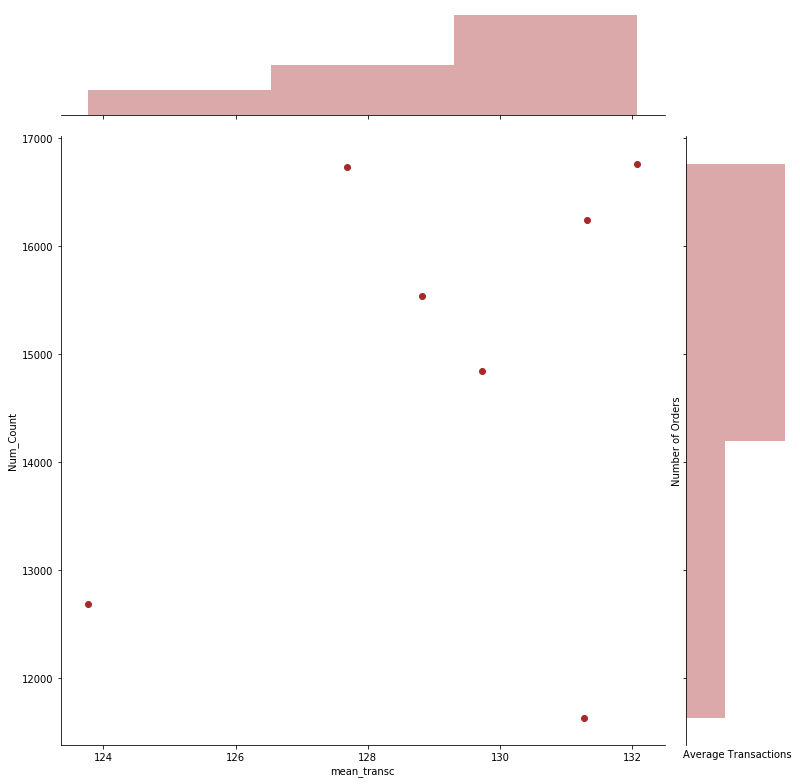

In [30]:
#join plot number of orders and transactional value(weekley)
weekley= pd.merge(week_trend, weekt_order, on = 'weekday', how= 'inner')

plt.figure(figsize=(11,11))
sns.jointplot(x='mean_transc', y='Num_Count', data=weekley,height=11, color='brown')
plt.xlabel("Average Transactions")
plt.ylabel("Number of Orders")



Text(0,0.5,'Order COunt')

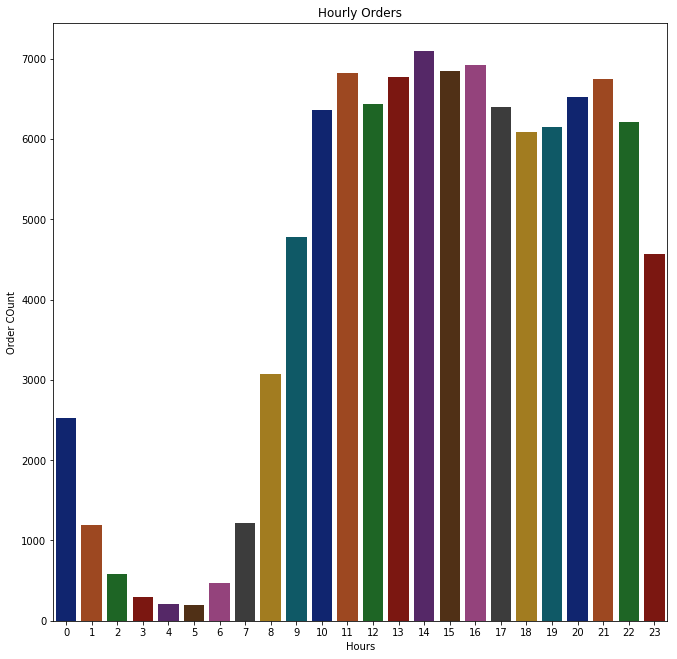

In [31]:
#trends by hours
hour_t= pd.DataFrame(order_pay_prod.groupby('hour').agg({'order_id':'count'}).rename(columns={'order_id':'hourly_count'}).reset_index())

plt.figure(figsize=(11,11))
hr=sns.barplot(x=hour_t['hour'],y=hour_t['hourly_count'],palette= 'dark')
hr.set_title("Hourly Orders")
hr.set_xlabel("Hours")
hr.set_ylabel("Order COunt")

Text(0.5,1,'Heatmap of tranactions over the hour by day')

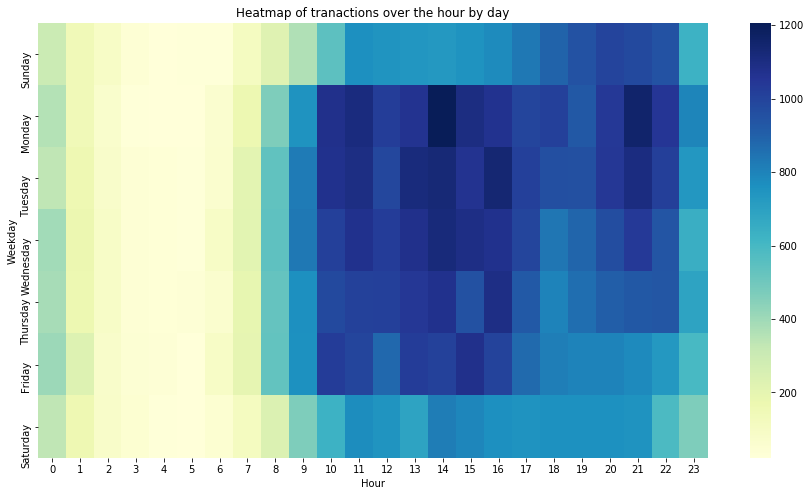

In [32]:
#Heatmap of tranactions over the hour by day
hr_day= order_pay_prod.groupby(['weekday','hour']).agg({'order_id':'count'}).rename(columns={'order_id':'frequency'}).reset_index()
#weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
#hr_day.week = hr_day.week.map(weekmap)
hr_day['weekday']=pd.Categorical(hr_day['weekday'],categories=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],ordered=True)

hr_day=hr_day.pivot('weekday','hour','frequency')


plt.figure(figsize=(15,8))
pt=sns.heatmap(hr_day, cmap="YlGnBu")
pt.set_xlabel("Hour")
pt.set_ylabel("Weekday")
pt.set_title("Heatmap of tranactions over the hour by day")

In [33]:
#merging data with geolocations
geo_zip_city= pd.DataFrame(geo.groupby('zip_code_prefix').agg({'lat':'mean','lng':'mean'}).reset_index())
order_pay_prod=order_pay_prod.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'})
order_pay_prod_geo = pd.merge(order_pay_prod,geo_zip_city, how = "left", on = ['zip_code_prefix','zip_code_prefix'])
order_pay_prod_geo.head()
#geo_zip.info()
order_pay_prod_geo['customer_city'].head()



0     Guaratuba
1    Uberlandia
2       Itapevi
3       Goiania
4        Recife
Name: customer_city, dtype: object

Text(0.5,1,'Average Transaction Value for each state')

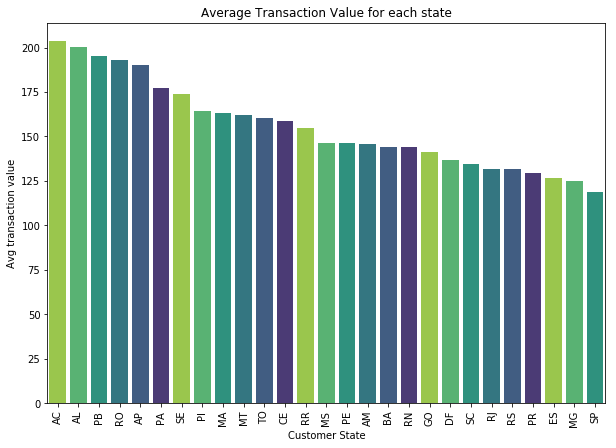

In [34]:
#city and state transactional value
state_transaction=pd.DataFrame(order_pay_prod.groupby('customer_state').agg({'order_products_value':'mean'}).rename(columns={'order_products_value':'avg_trans'}).sort_values(by='avg_trans',ascending=False)).reset_index()
plt.figure(figsize=(10,7))
ax=sns.barplot(x='customer_state',y='avg_trans',data=state_transaction,palette=sns.color_palette(palette="viridis_r"))
ax.set_xlabel('Customer State')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Avg transaction value')
ax.set_title("Average Transaction Value for each state")

Text(0.5,1,'Top 10 - Average Transaction Value for each City')

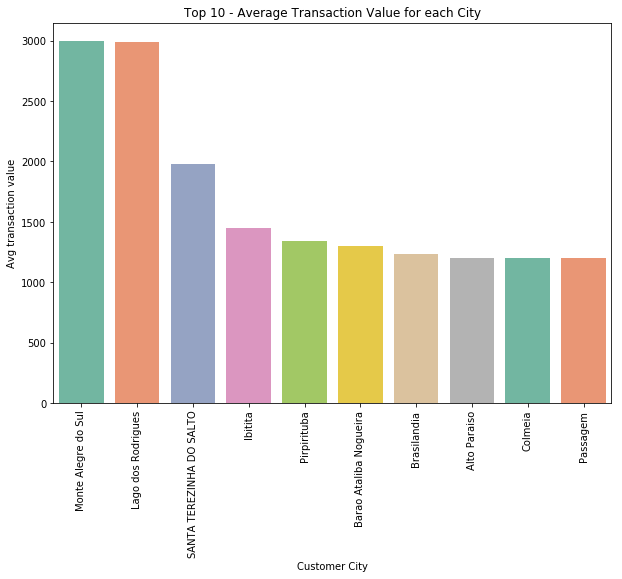

In [35]:
city_transaction=pd.DataFrame(order_pay_prod.groupby('customer_city').agg({'order_products_value':'mean'}).rename(columns={'order_products_value':'avg_trans'}).sort_values(by='avg_trans',ascending=False)).reset_index()
plt.figure(figsize=(10,7))
ax=sns.barplot(x='customer_city',y='avg_trans',data=city_transaction[:10],palette=sns.color_palette(palette="Set2"))
ax.set_xlabel('Customer City')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Avg transaction value')
ax.set_title("Top 10 - Average Transaction Value for each City")

In [36]:
#order delivery
order_pay_prod['day_to_delivery']=(order_pay_prod['order_delivered_customer_date']-order_pay_prod['order_purchase_timestamp']).dt.days
print("Average days to delivery {}".format(np.round(order_pay_prod['day_to_delivery'].mean(),0)))

Average days to delivery 12.0


In [37]:
order_pay_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104433 entries, 0 to 104432
Data columns (total 37 columns):
order_id                         104433 non-null object
order_status                     104433 non-null object
order_products_value             104433 non-null float64
order_freight_value              104433 non-null float64
order_items_qty                  104433 non-null int64
order_sellers_qty                104433 non-null int64
order_purchase_timestamp         104433 non-null datetime64[ns]
order_aproved_at                 104415 non-null object
order_estimated_delivery_date    104433 non-null object
order_delivered_customer_date    101910 non-null datetime64[ns]
customer_id                      104433 non-null object
customer_city                    104433 non-null object
customer_state                   104433 non-null object
zip_code_prefix                  104433 non-null int64
product_category_name            104433 non-null object
product_name_lenght              1

In [43]:
order_pay_prod_geo_cust= pd.merge(order_pay_prod_geo,customer, how= 'left', on=['customer_id','customer_id'])
print(order_pay_prod_geo_cust[['customer_unique_id']].nunique())
print(order_pay_prod_geo_cust[['order_id']].nunique())

customer_unique_id    92516
dtype: int64
order_id    96264
dtype: int64


# RFM

In [45]:
order_pay_prod_geo_cust['order_purchase_timestamp'].max()

Timestamp('2018-09-28 10:54:31')

In [90]:
recency_df = order_pay_prod_geo_cust.groupby(by='customer_unique_id', as_index= False)['order_purchase_timestamp'].max()
recency_df.columns = ['customer_unique_id','order_purchase_timestamp']
recency_df.head()

,customer_unique_id,order_purchase_timestamp
0,000329c0b406d30f7e92fbd6a88a009e,2017-02-27 12:11:10
1,0003418b36ed466545169cac383b59b4,2017-10-07 14:58:15
2,000446ff827ee6397d0f00816d6a1fb2,2017-10-20 12:58:35
3,0004983adf3647e6c0bf708af02e94e4,2017-10-04 23:25:51
4,0004e8eb194ba10ce76319ad18b09a5c,2018-03-27 11:26:05


In [91]:
recency_df['date']=[d.date() for d in recency_df['order_purchase_timestamp']]

recency_df.drop('order_purchase_timestamp', axis=1,inplace= True)
recency_df['date'].max()

datetime.date(2018, 9, 28)

In [56]:
#we will use it for refernce
now= dt.date(2018,9,28)
print(now)

2018-09-28


In [108]:
recency_df['Recency'] = recency_df['date'].apply(lambda x: (now - x).days)
recency_df.drop('date', axis=1,inplace= True)
recency_df.sort_values(by= 'Recency',ascending=False).head(10)


,customer_unique_id,Recency
58377,a18200297fa8c34eb4026fe8e9199e4f,754
85170,eb64ef2d9c972ddc3566469b4bc7b719,753
59500,a49ec569381c0119996f2aa03f0fb5cb,743
51449,8e0567ef5c1580a740f050e098b149eb,743
20345,381cb0b3cb82b5b8077a3627c8612758,743
5676,0fb41140df2aa9c20a5c04d9aed02e93,726
49900,89bfd208700b28f8437a3719437ee47c,725
89130,f67fbf5e23f401ee37c4adbb3d50346a,725
89059,f648d448c4d9a86e8a66f118a8d9e8ab,725
27192,4b0e377232b2e8cfbf95fb445d072bac,725


In [156]:
#Frequency: Frequqency will tell us how many times a customer ordered, for that we have to calculate different order_id for a customer
order_pay_prod_geo_cust_v1 = order_pay_prod_geo_cust
order_pay_prod_geo_cust_v1.drop_duplicates(subset=['order_id','customer_unique_id'],keep='first', inplace= True)
#calulating frequency
freq_df= order_pay_prod_geo_cust_v1.groupby(by=['customer_unique_id'], as_index= False)['order_id'].count()
freq_df.columns=['customer_unique_id','frequency']
freq_df.sort_values(by='frequency',ascending=False).head(10)




,customer_unique_id,frequency
92248,ff4ea78481e00334563aea6d1681f496,10
65779,b6169cb608e0a9d1b0ed53b93fe21713,10
52643,915f2fe0968adc3e5a76d70ca9326bf5,9
27836,4cc4fa5148dca9dd9570607562cffc0e,8
43272,779ab1cce17159b31d6a0a4694644455,8
13757,262488d8e925a2e0d343c1834ad05986,7
92042,fea959ffb276f0e5a9126f057748e153,7
71876,c6fb06129d290690c3f548417b6770ee,7
71104,c4eb922ad36837ae004274022bf696eb,7
61440,aa241ccd03ec28c5421b318fef927b98,7


In [106]:
order_pay_prod_geo_cust[['value','order_products_value','order_id','order_items_qty']].head()

,value,order_products_value,order_id,order_items_qty
0,363.74,349.90,b95df3cef5297e79ef709ba256518f6f,1
67674,140.49,89.99,e9c4c61fc2e0849ca2bf702265e47c91,1
67673,152.17,139.99,c08d66a6714c940c505deae9b3916bcf,1
67672,123.73,104.90,5d15ec992a829ae0c5a53d8e6030f08f,1
67669,12.87,21.99,4212c4acae39b267aabc4696d873cbcf,1


In [157]:
#monetary:How much money did the customer spent over time
#considering value as final amount after all calculations
monetary_df = order_pay_prod_geo_cust.groupby(by='customer_unique_id', as_index= False).agg({'value':'sum'})
monetary_df.columns=['customer_unique_id','Monetary']
monetary_df.head(10)

,customer_unique_id,Monetary
0,000329c0b406d30f7e92fbd6a88a009e,43.25
1,0003418b36ed466545169cac383b59b4,76.02
2,000446ff827ee6397d0f00816d6a1fb2,122.98
3,0004983adf3647e6c0bf708af02e94e4,38.78
4,0004e8eb194ba10ce76319ad18b09a5c,113.30
5,000582d689d51a072c64c56aa9f9e6fd,57.72
6,000592aca1e2a140b152d0e81d3c2a22,357.90
7,000627108229dbae094b1a65dc114589,53.50
8,0006b4b973b90367b61f44e0c4df202e,143.83
9,000742f2f672341c860e2b2ef2d29a07,45.78


In [158]:
#merging recency, frequency and monetary dataframes
tmp_df= recency_df.merge(freq_df, on='customer_unique_id')
rfm_df=tmp_df.merge(monetary_df, on='customer_unique_id')
rfm_df.set_index('customer_unique_id',inplace = True)
rfm_df.head(10)

,Recency,frequency,Monetary
customer_unique_id,,,
000329c0b406d30f7e92fbd6a88a009e,578,1,43.25
0003418b36ed466545169cac383b59b4,356,1,76.02
000446ff827ee6397d0f00816d6a1fb2,343,1,122.98
0004983adf3647e6c0bf708af02e94e4,359,1,38.78
0004e8eb194ba10ce76319ad18b09a5c,185,1,113.30
000582d689d51a072c64c56aa9f9e6fd,575,1,57.72
000592aca1e2a140b152d0e81d3c2a22,298,1,357.90
000627108229dbae094b1a65dc114589,253,1,53.50
0006b4b973b90367b61f44e0c4df202e,473,1,143.83


In [118]:
#customer segments with rfm model
quantiles=rfm_df.quantile(q=[0.25,0.50,0.75])
quantiles

,Recency,frequency,Monetary
0.25,189.0,1.0,60.01
0.50,307.0,1.0,102.87
0.75,430.0,1.0,175.64


In [117]:
quantiles.to_dict()

{'Recency': {0.25: 189.0, 0.5: 307.0, 0.75: 430.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 60.01, 0.5: 102.87, 0.75: 175.64}}

In [129]:
#creation of RFM segments: two segmentation classes will be created on the basis of quantiles as high recency is bad for business and hig monetary and frequency is good for business
## Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def rscore(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1
def fmscore(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4

In [135]:
# Recency, frequency,monetary score rated from 4 to 1, where 4 is good and 1 is bad
#creating segmentation 
rfm_seg = rfm_df
rfm_seg['R_quartile']= rfm_seg['Recency'].apply(rscore,args=('Recency',quantiles))
rfm_seg['F_quartile']=rfm_seg['frequency'].apply(fmscore,args=('frequency',quantiles))
rfm_seg['M_quartile']=rfm_seg['Monetary'].apply(fmscore,args=('Monetary',quantiles))
rfm_seg.drop('RFM_Score',axis=1,inplace= True)
rfm_seg.head()

,Recency,frequency,Monetary,R_quartile,F_quartile,M_quartile
customer_unique_id,,,,,,
000329c0b406d30f7e92fbd6a88a009e,578,1,43.25,1,1,1
0003418b36ed466545169cac383b59b4,356,1,76.02,2,1,2
000446ff827ee6397d0f00816d6a1fb2,343,1,122.98,2,1,3
0004983adf3647e6c0bf708af02e94e4,359,1,38.78,2,1,1
0004e8eb194ba10ce76319ad18b09a5c,185,1,113.30,4,1,3


In [137]:
rfm_seg['RFM_Score']= rfm_seg.R_quartile.map(str)+ rfm_seg.F_quartile.map(str)+ rfm_seg.M_quartile.map(str)
rfm_seg.head()

,Recency,frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score
customer_unique_id,,,,,,,
000329c0b406d30f7e92fbd6a88a009e,578,1,43.25,1,1,1,111
0003418b36ed466545169cac383b59b4,356,1,76.02,2,1,2,212
000446ff827ee6397d0f00816d6a1fb2,343,1,122.98,2,1,3,213
0004983adf3647e6c0bf708af02e94e4,359,1,38.78,2,1,1,211
0004e8eb194ba10ce76319ad18b09a5c,185,1,113.30,4,1,3,413


In [138]:
rfm_seg[rfm_seg['RFM_Score']=='444'].sort_values('Monetary', ascending= False).head(10)

,Recency,frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score
customer_unique_id,,,,,,,
0bb48ab7aed4523f1000795ccf17c5b3,88,2,3673.28,4,4,4,444
e6fc50c010cd8984acfa1bca3b291064,51,2,1842.48,4,4,4,444
ff69b7f704286aca669854ef37dd8c6e,168,2,1738.44,4,4,4,444
b703c34c200cfe077158a01814de0269,21,2,1738.18,4,4,4,444
6b69de2cdeb5fbfa59362c98f2c3c560,171,3,1727.60,4,4,4,444
d00e1fcbcaa7bf3cb0eb839df96bb2b5,21,2,1691.03,4,4,4,444
39053ca58f79587e170a3f31faa0dd2a,147,2,1655.24,4,4,4,444
7ab27f7aa7d004882db7afce02bff8c3,113,3,1568.62,4,4,4,444
4cc4fa5148dca9dd9570607562cffc0e,9,8,1550.97,4,4,4,444


In [140]:
print("Best Customers: ",len(rfm_seg[rfm_seg['RFM_Score']=='444']))
print('Loyal Customers: ',len(rfm_seg[rfm_seg['F_quartile']==4]))
print("Big Spenders: ",len(rfm_seg[rfm_seg['M_quartile']==4]))
print('Almost Lost: ', len(rfm_seg[rfm_seg['RFM_Score']=='244']))
print('Lost Customers: ',len(rfm_seg[rfm_seg['RFM_Score']=='144']))
print('Lost Cheap Customers: ',len(rfm_seg[rfm_seg['RFM_Score']=='111']))

Best Customers:  573
Loyal Customers:  3330
Big Spenders:  23124
Almost Lost:  448
Lost Customers:  271
Lost Cheap Customers:  6332


In [141]:
#rfm_plot=pd.DataFrame(rfm_seg.groupby('RFM_Score'),)
rfm_seg['RFM_Score'].nunique()

32

Text(0,0.5,'Count')

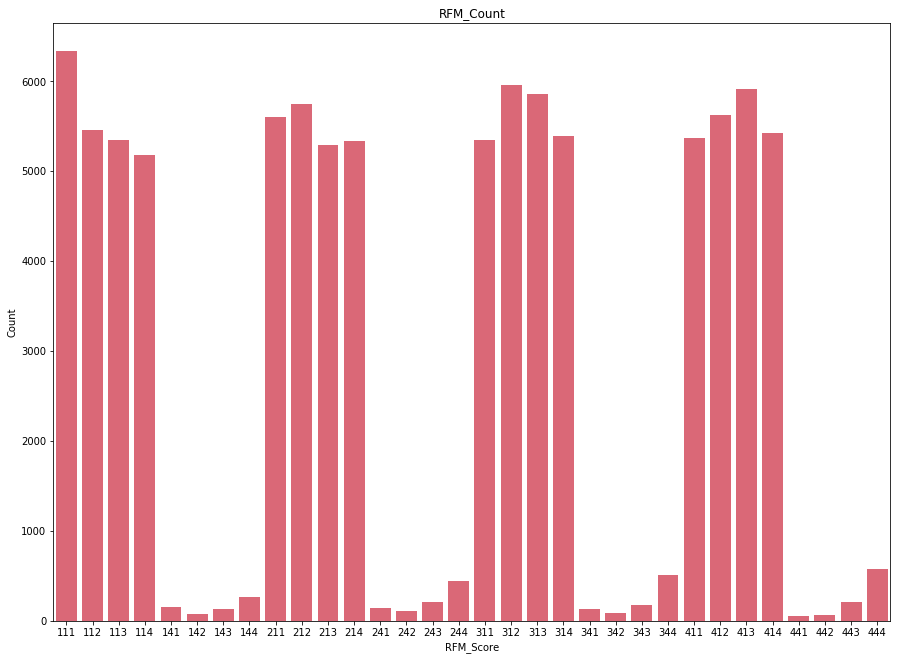

In [154]:
# @hidden_cell
rfm_plot=pd.DataFrame(rfm_seg.groupby('RFM_Score').agg({'RFM_Score':'count'}).rename(columns={'RFM_Score':'count'})).reset_index()
#x1 = rfm_plot.RFM_Score.tolist()
#y1 = rfm_plot.count.tolist()


plt.figure(figsize=(15,11))
ax=sns.barplot(x=x1,y='count',data=rfm_plot, color='#ed5569')
ax.set_title("RFM_Count")
ax.set_xlabel('RFM_Score')
ax.set_ylabel('Count')